# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('flujo-vehicular-2016.csv', sep =',')


In [3]:
data_2016.info()
data_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379443 entries, 0 to 1379442
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1379443 non-null  int64 
 1   fecha           1379443 non-null  object
 2   hora_inicio     1379443 non-null  int64 
 3   hora_fin        1379443 non-null  int64 
 4   dia             1379443 non-null  object
 5   estacion        1379443 non-null  object
 6   sentido         1379443 non-null  object
 7   tipo_vehiculo   1379443 non-null  object
 8   forma_pago      1379443 non-null  object
 9   cantidad_pasos  1379443 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.2+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,NO COBRADO,32
1,2016,2016-01-01,0,1,Viernes,Alberdi,Centro,Liviano,AUPASS,9
2,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,NO COBRADO,1
3,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EFECTIVO,4
4,2016,2016-01-01,1,2,Viernes,Alberdi,Centro,Liviano,EXENTO,3


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [4]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print(data_2016['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [5]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print(data_2016['tipo_vehiculo'].unique())


['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [6]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print(data_2016['forma_pago'].unique())


['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'AUPASS' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION' 'MONEDERO']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

## UNION DE LAS BASES DE DATOS

### UNION DE BASES DE DATOS Y FILTRO POR ESTACIÓN ILLIA

In [7]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
#mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')   
mask = (dataset.estacion=='Illia')   
dataset = dataset[mask]   

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio',   'hora_fin' ], inplace = True)   

dataset.head()

,fecha,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019-01-01,Martes,Illia,Centro,Liviano,NO COBRADO,146
20,2019-01-01,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019-01-01,Martes,Illia,Centro,Pesado,TELEPASE,1
22,2019-01-01,Martes,Illia,Provincia,Liviano,NO COBRADO,147
23,2019-01-01,Martes,Illia,Provincia,Liviano,TELEPASE,106


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752552 entries, 19 to 1372328
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fecha           752552 non-null  object
 1   dia             752552 non-null  object
 2   estacion        752552 non-null  object
 3   sentido         752552 non-null  object
 4   tipo_vehiculo   752552 non-null  object
 5   forma_pago      752552 non-null  object
 6   cantidad_pasos  752552 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 45.9+ MB


In [9]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) 

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha',], inplace = True)

dataset.head()

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
19,Martes,Illia,Centro,Liviano,NO COBRADO,146,2019-01-01
20,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01
21,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01
22,Martes,Illia,Provincia,Liviano,NO COBRADO,147,2019-01-01
23,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01


#### Asignamos la variable año con el fin de agrupar pasos bajo este parametro.

In [10]:
dataset['yr'] = dataset['fecha2'].dt.year
dataset.head()

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2,yr
19,Martes,Illia,Centro,Liviano,NO COBRADO,146,2019-01-01,2019
20,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01,2019
21,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01,2019
22,Martes,Illia,Provincia,Liviano,NO COBRADO,147,2019-01-01,2019
23,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01,2019


## PREGUNTAS AL DATASET:

### Existe variación en el comportamiento de pasos a nivel total entre los años?
### Que incidencia tiene el tipo de vehículo sobre los pasos por el peaje Illia?
### Hay migración en la forma de pago entre un año y otro?

### ANÁLISIS COMPORTAMIENTO TOTAL PASOS

In [11]:
dt_all = dataset.groupby(['yr' , 'tipo_vehiculo'])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )

dt_all1 = dataset.groupby(['yr'])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )


print(dt_all1)
print(dt_all)

      cantidad_pasos
yr                  
2017        33570584
2018        34490038
2019        34155167
                    cantidad_pasos
yr   tipo_vehiculo                
2017 Liviano              32069973
     Pesado                1500611
2018 Liviano              33057425
     Pesado                1432613
2019 Liviano              33091887
     Pesado                1063280


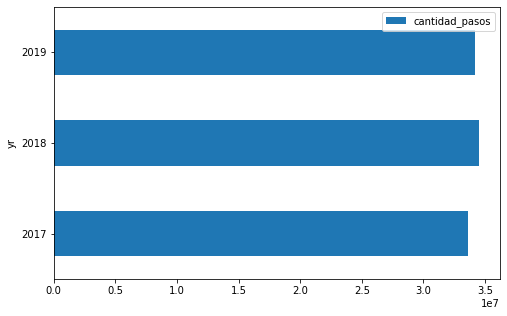

In [12]:
dt_all1.plot(kind = 'barh' , figsize = (8,5));  

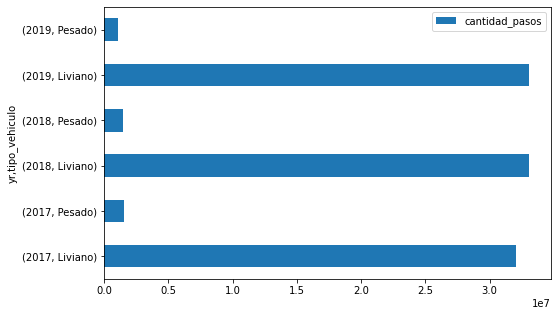

In [13]:
dt_all.plot(kind = 'barh' , figsize = (8,5));         

En este dataset donde se encuentran todos los tipos de pago en el peaje de Illia, se puede observar que la totalidad de pasos tiene un pequeño crecimiento entre el año 2017 y 2018 del 2.7% a nivel total y entre el año 2018 y 2019 se mantiene practicamente igual, con un total de pasos en el año 2019 equivalente al 99% del año 2020.

Sin embargo, después de analizar por tipo de vehículo, encontramos que el crecimiento real se está dando a nivel de vehículos livianos, pasando del año 2017 al 2018 a un 103% y manteniendose en el año 2019, pero en transporte pesado, en el año 2018 presenta una disminución del 4.5% y en el año 2019 la caida es mas importante, de un 26%



### ANÁLISIS COMPORTAMIENTO PASOS DIFERENTES EN EFECTIVO

In [14]:
mask_otros = (dataset.forma_pago != 'EFECTIVO')   
  
dataset_otros = dataset[mask_otros]   

dt_otros = dataset_otros.groupby([ 'yr' , 'tipo_vehiculo' ])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )

dt_otros1 = dataset_otros.groupby([ 'yr'  ])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )
print(dt_otros1)
print(dt_otros)

      cantidad_pasos
yr                  
2017        15787072
2018        18523094
2019        20040042
                    cantidad_pasos
yr   tipo_vehiculo                
2017 Liviano              14972171
     Pesado                 814901
2018 Liviano              17615301
     Pesado                 907793
2019 Liviano              19293284
     Pesado                 746758


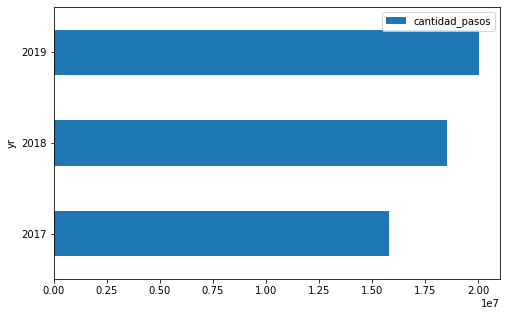

In [15]:
dt_otros1.plot(kind = 'barh' , figsize = (8,5));         

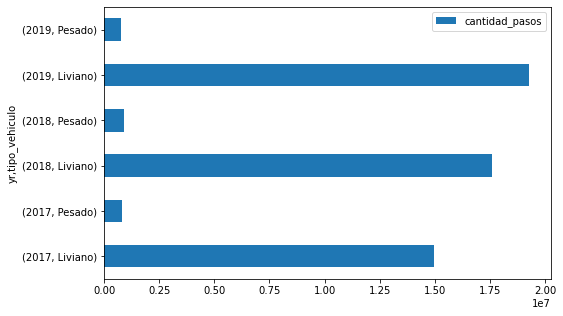

In [16]:
dt_otros.plot(kind = 'barh' , figsize = (8,5)); 

Al realizar un análisis del comportamiento de los pasos para pagos diferentes de efectivo, el comportamiento es un crecimiento en el año 2018 del 17% (muy superior al valor agregado total) y un crecimiento del 8% para el año 2019 (también muy superior al crecimiento del total de pasos), los crecimientos a nivel de tipo de vehículo son medianamente similares al total, a diferencia de los vehículos pesados que presentan una disminución del 18%, sin embargo, menor al valor total.

### ANÁLISIS COMPORTAMIENTO PASOS EN EFECTIVO

In [17]:
mask_efectivo = (dataset.forma_pago == 'EFECTIVO')   
  
dataset_efectivo = dataset[mask_efectivo]   

dt_efectivo = dataset_efectivo.groupby([ 'yr' , 'tipo_vehiculo' ])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )

dt_efectivo1 = dataset_efectivo.groupby([ 'yr'  ])['cantidad_pasos'].agg(
            cantidad_pasos = ('sum' ) 
            )


print(dt_efectivo1)
print(dt_efectivo)

      cantidad_pasos
yr                  
2017        17783512
2018        15966944
2019        14115125
                    cantidad_pasos
yr   tipo_vehiculo                
2017 Liviano              17097802
     Pesado                 685710
2018 Liviano              15442124
     Pesado                 524820
2019 Liviano              13798603
     Pesado                 316522


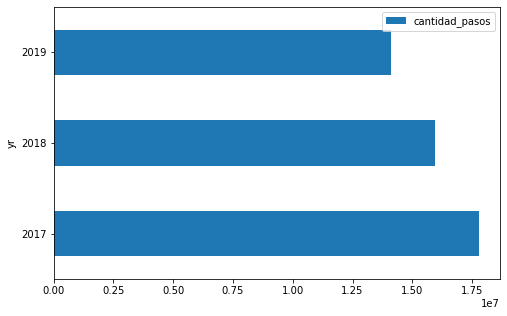

In [18]:
dt_efectivo1.plot(kind = 'barh' , figsize = (8,5));               

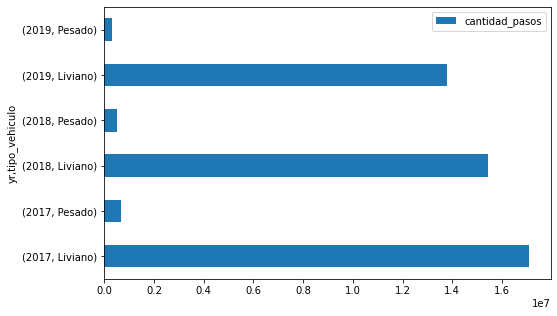

In [19]:
dt_efectivo.plot(kind = 'barh' , figsize = (8,5));       

Al realizar el análisis del comportamiento de pasos de vehículos que pagan en efectivo, se encuentra que hay una tendencia de disminución entre años, en el año 2018 se disminuye en un 11% y en el año 2019 se desminuye en un 12%, esto contrastado con el comportamiento de los pasos totales que cancelan con otro medio de pago nos permite concluir que:

1. No existe una disminución representativa a nivel total de pasos por el peaje de Illia entre los años 2017-2018-2019, existe una leve disminución de los pasos de vehículos pesados, pero a nivel de vehiculos livianos hay un crecimiento de al menos un 3.18% entre el 2017 y 2019.

2. Existe una disminución marcada de pasos que pagan en efectivo en el peaje de Illia, con una disminución del 20% entre el año 2017 y 2019.

3. A diferencia de los pagos en efectivo, los pasos con pagos por otros medios se incrementó entre el año 2017 y 2019 un 26%, en especial los vehículos livianos que incrementaron en un 28%

4. Dadas las premisas anteriores podemos deducir que hay un cambio en la modalidad de pago en el peaje de Illia, migrando del pago en efectivo a otros medios de pago.

### PARA CONTINUAR CON EL ANÁLISIS TOMAREMOS EL DATASET FILTRADO POR ILLIA Y PAGO EN EFECTIVO

In [20]:
dataset_efectivo.head()

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2,yr
80,Martes,Illia,Centro,Liviano,EFECTIVO,537,2019-01-01,2019
86,Martes,Illia,Centro,Pesado,EFECTIVO,1,2019-01-01,2019
88,Martes,Illia,Provincia,Liviano,EFECTIVO,443,2019-01-01,2019
94,Martes,Illia,Provincia,Pesado,EFECTIVO,1,2019-01-01,2019
149,Martes,Illia,Centro,Liviano,EFECTIVO,769,2019-01-01,2019


In [21]:
#Reordenamos el dataset por fecha
dataset_efect = dataset_efectivo.copy()

dataset_efect.sort_values('fecha2', inplace = True)
dataset_efect.reset_index(drop=True, inplace = True)
dataset_efect.drop(columns = ['yr'], inplace = True)   
dataset_efect

,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,Domingo,Illia,Centro,Liviano,EFECTIVO,857,2017-01-01
1,Domingo,Illia,Provincia,Liviano,EFECTIVO,561,2017-01-01
2,Domingo,Illia,Provincia,Liviano,EFECTIVO,12,2017-01-01
3,Domingo,Illia,Centro,Pesado,EFECTIVO,1,2017-01-01
4,Domingo,Illia,Centro,Pesado,EFECTIVO,21,2017-01-01
...,...,...,...,...,...,...,...
238864,Martes,Illia,Provincia,Pesado,EFECTIVO,6,2019-12-31
238865,Martes,Illia,Provincia,Liviano,EFECTIVO,276,2019-12-31
238866,Martes,Illia,Centro,Pesado,EFECTIVO,16,2019-12-31
238867,Martes,Illia,Provincia,Liviano,EFECTIVO,224,2019-12-31


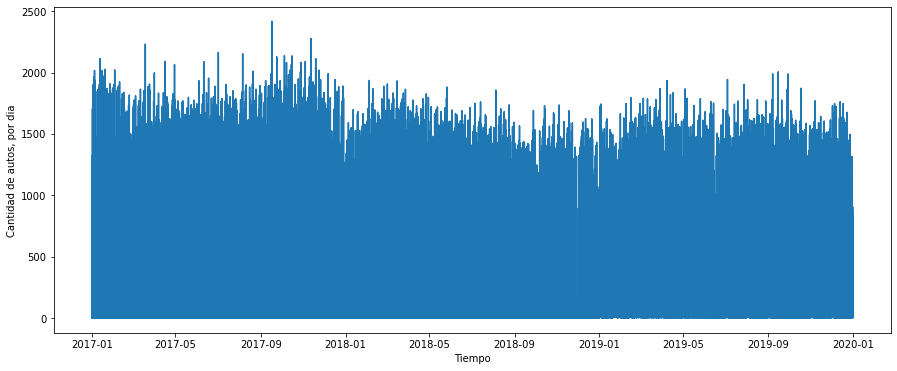

In [22]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_efect.fecha2, dataset_efect.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## RESAMPLEO EN DIAS

In [23]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable

diario = dataset_efect.resample('D', on = 'fecha2').sum()
print(diario.shape)
diario.head(20)

(1095, 1)


,cantidad_pasos
fecha2,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
2017-01-06,57081
2017-01-07,41587
2017-01-08,36065
2017-01-09,53036


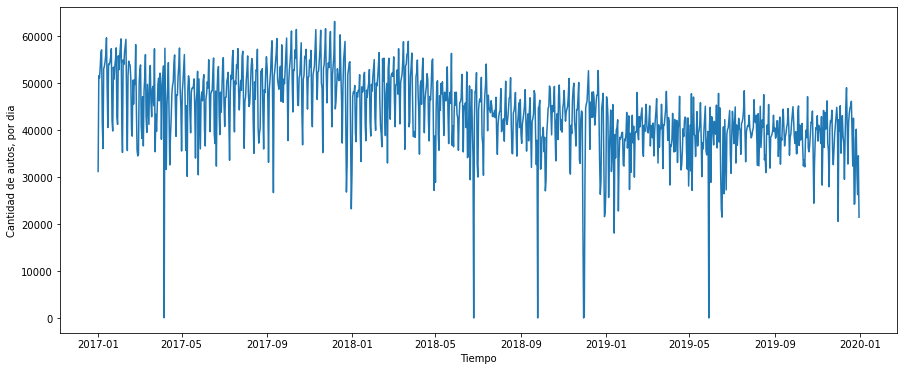

In [24]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### Generamos un boxplot para determinar los valores atípicos

Text(0.5, 1.0, 'Distribución por número pasos dia')

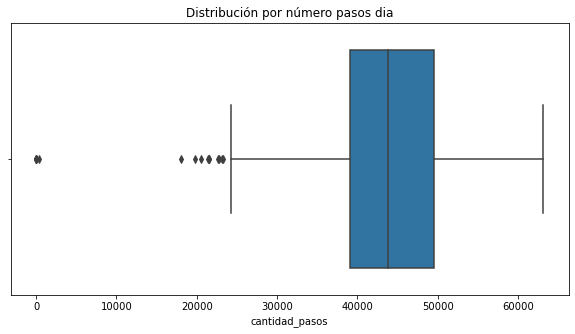

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(data = diario , x = "cantidad_pasos").set_title("Distribución por número pasos dia")

Visualmente se encuentra que los valores atípicos se encuentran por debajo de 25.000, se procederá a darles valor 0 para después interpolarlos

In [26]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
diario2 = diario.copy()
diario2.cantidad_pasos[diario2.cantidad_pasos <= 25000 ] = np.nan
diario2 = diario2.interpolate()
diario2.head(5)



,cantidad_pasos
fecha2,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


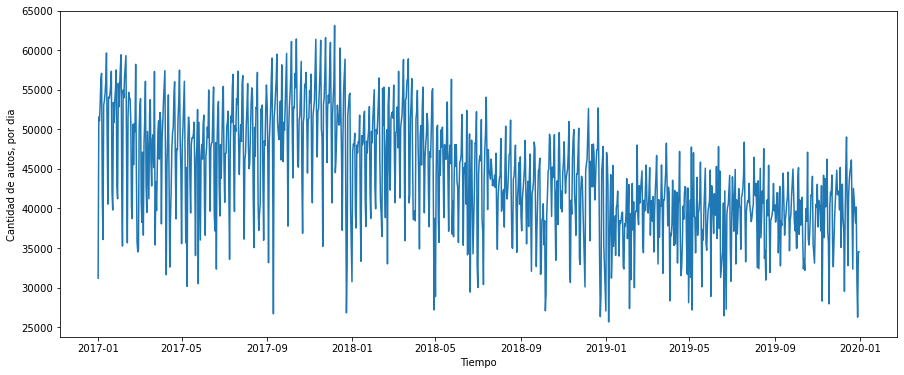

In [27]:
plt.figure(figsize = (15,6))
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [28]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
diariox = diario2.copy()
diariox = diariox[(diariox.cantidad_pasos <= 25000)]
diariox.head(5)

,cantidad_pasos
fecha2,


## AUTOCORRELACION

In [29]:
from statsmodels.tsa.stattools import acf
nlags = 28
autocorr = acf(diario2.cantidad_pasos, nlags = nlags , fft = False)

Text(0.5, 0, 'lag')

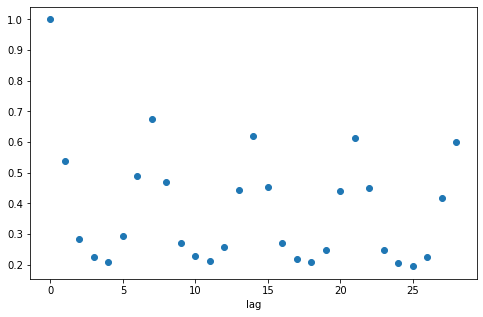

In [30]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

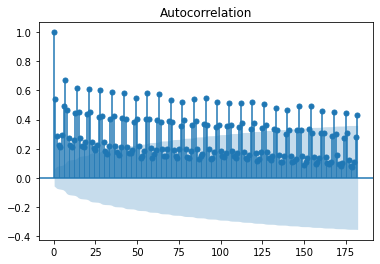

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diario2.cantidad_pasos, lags = 182)
plt.show()

El modelo muestra una alta correlación cada siete días, es decir que es probable que el día de la semana sea importante para determinar el número de vehículos que pasan por el peaje, además que los días 2 y 6 tambien tienen una importancia relativa; de igual forma estas autocorrelaciónes empiezan a perder importancia a partir de la muestra 125 

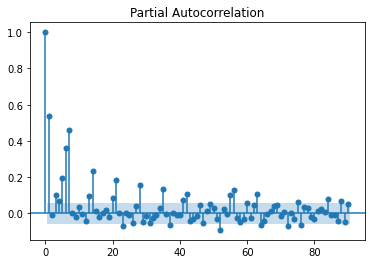

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

plot_pacf(diario2.cantidad_pasos, lags=90)
plt.show()

In [33]:
#Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
X = diario2.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.902620
p-value: 0.330829
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Valor p> 0.05: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.

valor p <= 0.05: Rechaza la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios.

## COMPONENTES DE LA SERIE

### MEDIA MÓVIL

In [34]:
ventana = int(90)
diario_promedio_tendencia = diario2.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

fecha2
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

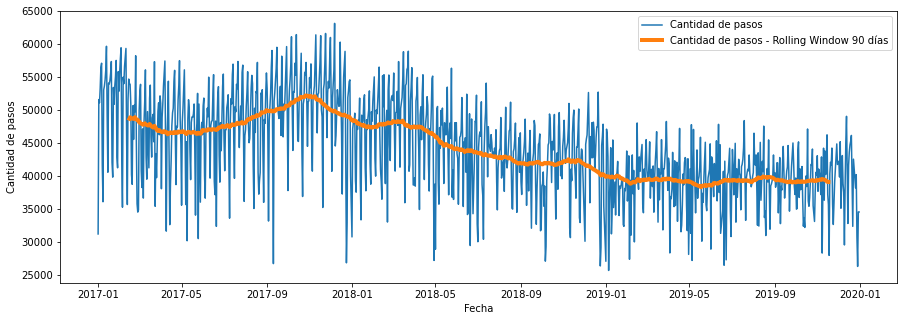

In [35]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window 90 días')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Al determinar una media móvil con una ventana de 90 días, se puede observar que aproximadamente entre el último trimestre del 2017 hasta el primer trimestre del 2019 se marca una tendencia de disminución en ese promedio 90 días y una estabilización en lo que resta del año.

### TENDENCIA LINEAL

In [36]:
diario2['fecha_numeros']=diario2.index.map(datetime.datetime.toordinal)
diario2.head()

,cantidad_pasos,fecha_numeros
fecha2,,
2017-01-01,31183.0,736330
2017-01-02,51568.0,736331
2017-01-03,51093.0,736332
2017-01-04,53332.0,736333
2017-01-05,56486.0,736334


In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario2.fecha_numeros.values.reshape(-1, 1), diario2.cantidad_pasos)

LinearRegression()

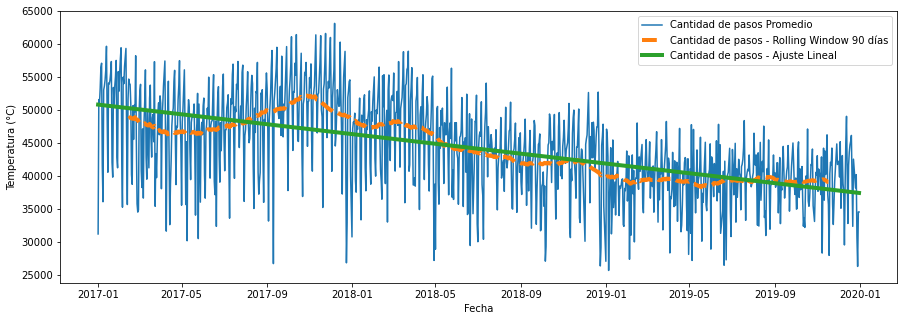

In [38]:
plt.figure(figsize = (15,5))
plt.plot(diario2.index, diario2.cantidad_pasos, label = 'Cantidad de pasos Promedio')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos - Rolling Window 90 días')
plt.plot(diario2.index, lr.predict(diario2.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Ahora bien, la información de tendencia de disminución que traemos del movil 90 días, se refuerza con la gráfica de tendencia líneal donde se observa de forma muy marcada una tendencia de disminución, esto está explicado muy probablemente por el análisis que hicimos al inicio del proyecto donde se podía evidenciar que si bien los pasos de vehículos (total) se mantienen e incluso tienen una leve tendencia de crecimiento, los pasos de vehículos que pagan en efectivo se ven disminuidos de forma importante en contraste con las otras formas de pago.

### OTROS

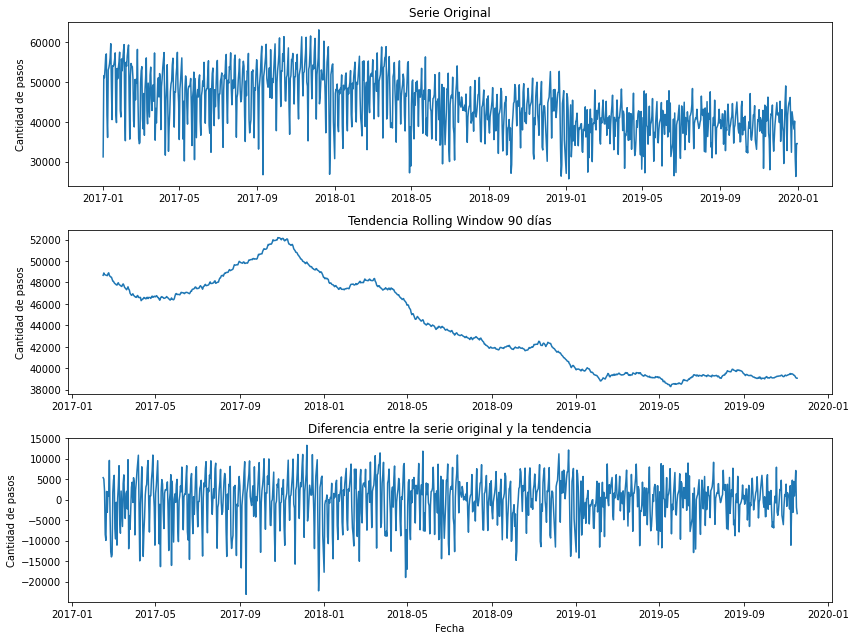

In [39]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario2.index, diario2.cantidad_pasos)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window 90 días')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario2.index, diario2.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')

plt.tight_layout()
plt.show()

El análisis de la diferencia entre la media móvil 90 días y los datos originales es significativa visualmente, es posible que esto no permita realizar una buena predicción por parte del modelo.

<Figure size 2880x1440 with 0 Axes>

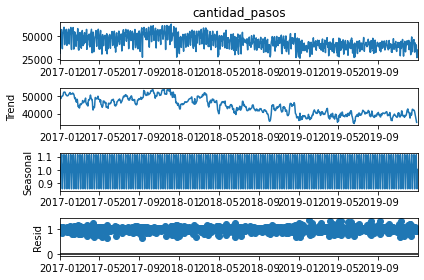

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize = (40,20))
result = seasonal_decompose(diario2.cantidad_pasos, model='multiplicative') # “multiplicative”
result.plot()
plt.show()

In [41]:
result.trend

fecha2
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    35787.428571
2019-12-28    34851.190476
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [42]:
result.seasonal

fecha2
2017-01-01    0.854709
2017-01-02    0.973181
2017-01-03    1.001339
2017-01-04    1.042294
2017-01-05    1.069948
                ...   
2019-12-27    1.114223
2019-12-28    0.944306
2019-12-29    0.854709
2019-12-30    0.973181
2019-12-31    1.001339
Freq: D, Name: seasonal, Length: 1095, dtype: float64

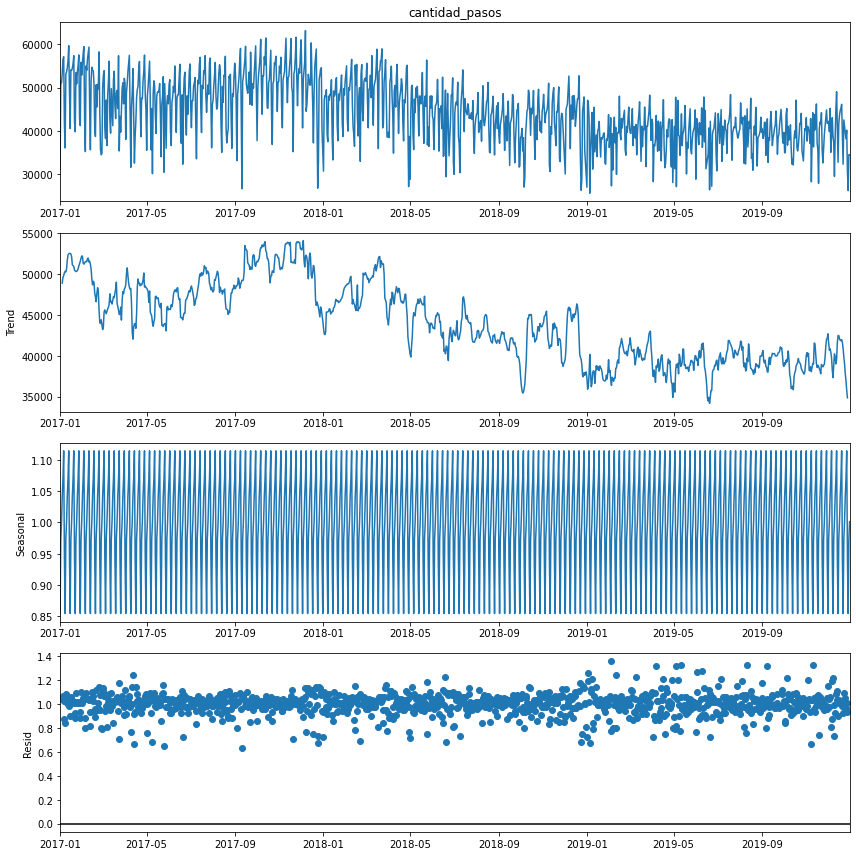

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

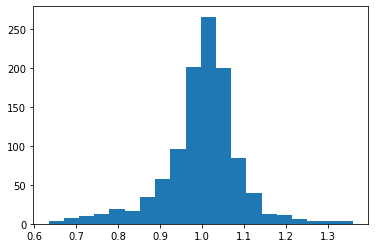

In [44]:
plt.figure(figsize = (6,4))
plt.hist(result.resid, bins = 20)
plt.show()

## PREDICCIÓN 30 últimos días 2019

In [45]:
senial = diario2.cantidad_pasos
senial.head()

fecha2
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [46]:
senial

fecha2
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    34523.0
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

En primer lugar, debemos definir cuántos valores *hacia atrás* tomaremos.

In [47]:
look_back = 90

Creamos los `X` e `y` con ceros para luego llenar con los datos. Notar los `shape`

In [48]:
N = senial.shape[0]
X = np.zeros((N - look_back-1 ,look_back))
y = np.zeros(N - look_back -1)
print(X.shape, y.shape)

(1004, 90) (1004,)


Llenamos los `X` e `y`

In [49]:
for i in range(X.shape[0]):

    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [50]:
X.shape

(1004, 90)

In [51]:
X , y

(array([[31183.        , 51568.        , 51093.        , ...,
         51074.        , 46235.        , 52127.        ],
        [51568.        , 51093.        , 53332.        , ...,
         46235.        , 52127.        , 50995.        ],
        [51093.        , 53332.        , 56486.        , ...,
         52127.        , 50995.        , 38045.        ],
        ...,
        [38348.        , 37170.        , 39669.        , ...,
         39622.33333333, 38168.        , 40182.        ],
        [37170.        , 39669.        , 34943.        , ...,
         38168.        , 40182.        , 30681.        ],
        [39669.        , 34943.        , 35054.        , ...,
         40182.        , 30681.        , 26259.        ]]),
 array([50995., 38045., 48833., ..., 30681., 26259., 34523.]))

Es importante notar que el tiempo de la medición - fecha - ya no es parte de los datos.

Hacemos el train/test split. Esta parte puede ser confusa, por lo que presta atención a cómo lo hacemos.

In [52]:
N_train = 1004 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(914, 90) (914,)
(90, 90) (90,)


In [53]:
X_test

array([[37124.        , 40815.        , 44932.        , ...,
        38348.        , 37170.        , 39669.        ],
       [40815.        , 44932.        , 32975.        , ...,
        37170.        , 39669.        , 34943.        ],
       [44932.        , 32975.        , 41090.        , ...,
        39669.        , 34943.        , 35054.        ],
       ...,
       [38348.        , 37170.        , 39669.        , ...,
        39622.33333333, 38168.        , 40182.        ],
       [37170.        , 39669.        , 34943.        , ...,
        38168.        , 40182.        , 30681.        ],
       [39669.        , 34943.        , 35054.        , ...,
        40182.        , 30681.        , 26259.        ]])

In [54]:
y_test

array([34943.        , 35054.        , 43775.        , 45150.        ,
       36722.        , 41064.        , 37894.        , 38100.        ,
       41414.        , 36383.        , 32359.        , 33626.        ,
       32168.        , 37928.        , 39997.        , 38379.        ,
       47105.        , 36187.        , 35383.        , 36687.        ,
       38960.        , 41737.        , 41593.        , 44064.        ,
       35475.        , 34278.        , 33081.        , 37630.        ,
       40527.        , 40159.        , 43053.        , 37655.        ,
       41024.        , 40486.        , 39814.        , 37153.        ,
       42866.        , 28286.        , 37738.        , 44193.        ,
       36314.        , 43761.        , 40201.        , 42486.        ,
       46216.        , 37172.        , 35640.        , 27937.        ,
       40345.        , 42049.        , 41656.        , 44215.        ,
       35675.        , 32623.        , 36038.        , 39138.        ,
      

In [55]:
print (look_back)
print (N_train) 
print (N_test)
print (N_total)
print (length_total)
#print (X_train)
#print (y_train)
#print (X_test)
#print (y_test)


90
914
90
1004
1094


## Modelo RandomForestRegressor

Cargamos el modelo a utilizar que será el RandomForestRegressor, al ser un modelo de regresión y no de clasificación considero que este es el modelo adecuado, además que permite hacer el split de los datos en ventanas de tiempo y no de forma aleatoria, pues al ser una serie de tiempo el entrenamiento se debe hacer en series de pasados que predigan el futuro, no se debería hacer de forma inversa.

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=420, criterion = "mse" , max_features='sqrt', max_depth=51 , min_samples_leaf = 2,
                               min_samples_split = 3 , n_jobs=-1, oob_score = False, random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=51, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=3, n_estimators=420, n_jobs=-1,
                      random_state=42)

### MEJORA DE HIPERPARAMETROS RANDOMSEARCH

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
param_grid_RF = {'n_estimators':np.arange(50, 500),
              'max_depth':np.arange(10, 60),
              'criterion': [ 'mse' ],
              'min_samples_split':np.arange(2, 4),
              'min_samples_leaf':np.arange(1, 4)
                }     

In [63]:
model_RF = RandomizedSearchCV(rf, param_grid_RF, n_iter=100, random_state=0, cv=5 , n_jobs = -1  )
model_RF.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=51,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=3,
                                                   n_estimators=420, n_jobs=-1,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456,

In [64]:
print("Mejores parametros: "+str(model_RF.best_params_))
print("Mejor Score: "+str(model_RF.best_score_)+'\n')

scores_RF = pd.DataFrame(model_RF.cv_results_)


Mejores parametros: {'n_estimators': 420, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 51, 'criterion': 'mse'}
Mejor Score: 0.34951495690816



### Importancia de los features

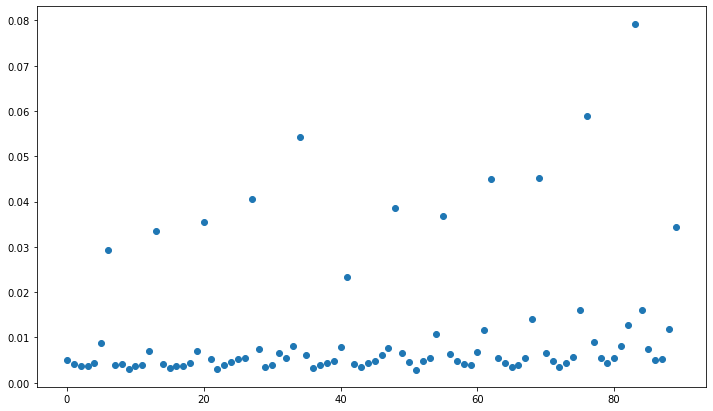

In [65]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)

plt.show()

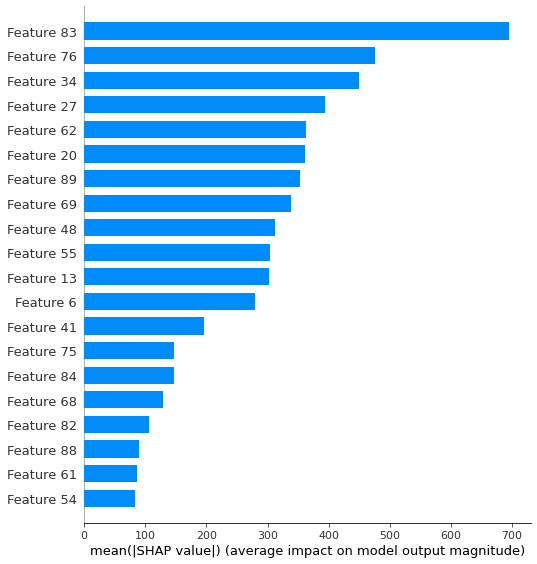

In [66]:
import shap
model = model_RF.best_estimator_
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

El modelo le da gran importancia al mismo día de la semana de las 2 semanas anteriores; además los siguiente 4 datos de mayor relevancia coinciden con el mismo día de la semana de semanas anteriores del look back, y después le asigna una importancia similar al día anterior.

### PREDICCIÓN DEL MODELO

In [57]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Y graficamos. Este gráfico también puede ser confuso, por lo que presta atención a cada línea. Si quieres, puedes ir comentando y descomentando cada línea para ver bien qué está haciendo y que el gráfico no quede tan sobrecargado.

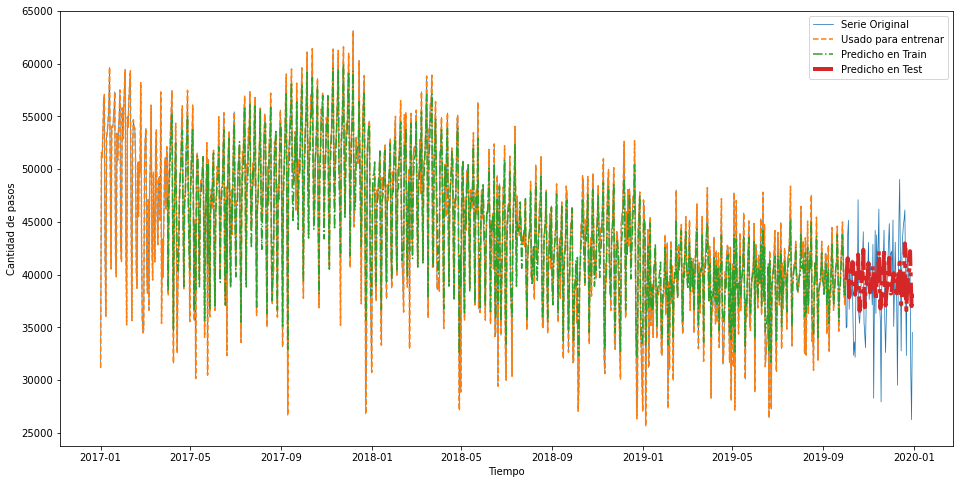

In [58]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Calculamos el error RMSE en train y test.

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))
r2_train = r2_score(y_train, y_train_pred)
print('R2_train' , r2_train )


MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))
r2_test = r2_score(y_test, y_test_pred)
print('R2_test' , r2_test )

Error en Train: 1987.0828515354306
R2_train 0.921823261213586
Error en Test: 3919.8214600848887
R2_test 0.2567842407156177


Se podría deducir que a pesar que los resultados en train son aceptablemente buenos, al momento de aplicarlos en test el rendimiento baja demasiado.

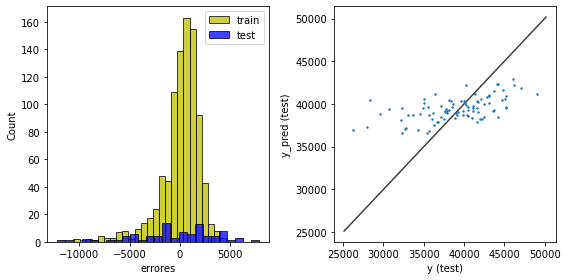

In [60]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, bins = 25, label = 'train' , color = "y")
sns.histplot(y_test - y_test_pred, bins = 25, label = 'test' , color ="b")
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

El modelo una importante distorsión al momento de asignar pasos de vehículos, solo parece acertar medianamente entre los 35.000 y 40.000, pero cuando está por debajo de ese valor en la serie original asigna valores más altos y cuando está por encima asigna valores más bajos.

## **Benchmark**: comparamos el error con el que habríamos obtenido si predecíamos copiando el valor del mismo día de la semana anterior.

In [61]:
y_test_pred_benchmark = y[-7 + N_train:N_train+N_test - 7]

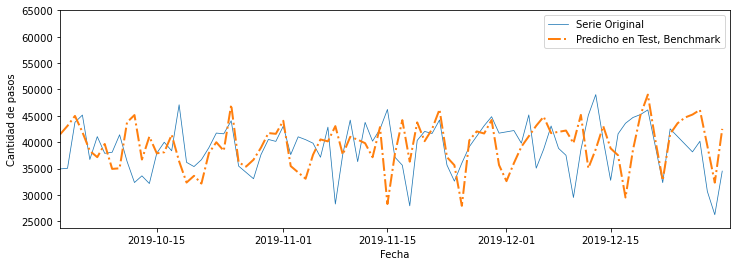

In [62]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [63]:
y_test_pred_benchmark = y[-7 + N_train:N_train+N_test - 7]
MSE = mean_squared_error(y_test, y[-7 + N_train:N_train+N_test - 7])
print(np.sqrt(MSE))

r2_test_antday = r2_score(y_test, y[-7 + N_train:N_train+N_test - 7])
print('R2_test_antday' , r2_test_antday )

5722.346435059617
R2_test_antday -0.5839104751501405


El resultado sin ser óptimo es mejor que el benchmark por lo cual el modelo es valido.

## MULTI-STEP PREDICTION

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [64]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

<AxesSubplot:>

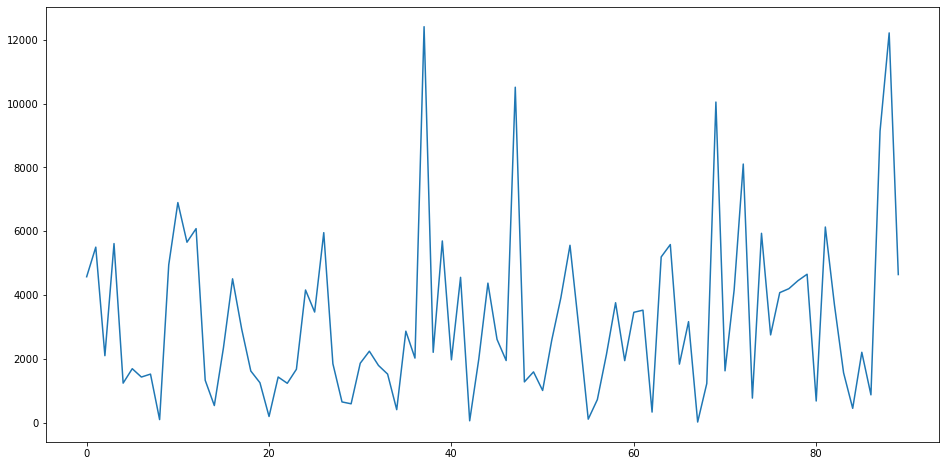

In [65]:
plt.figure(figsize=(16,8))
pred_comp = pd.DataFrame()
pred_comp['y_test'] = y_test
pred_comp['y_test_model'] = y_ms_test_pred
pred_comp['abs_diff'] = abs(pred_comp['y_test']-pred_comp['y_test_model'])
pred_comp['abs_diff'].plot()

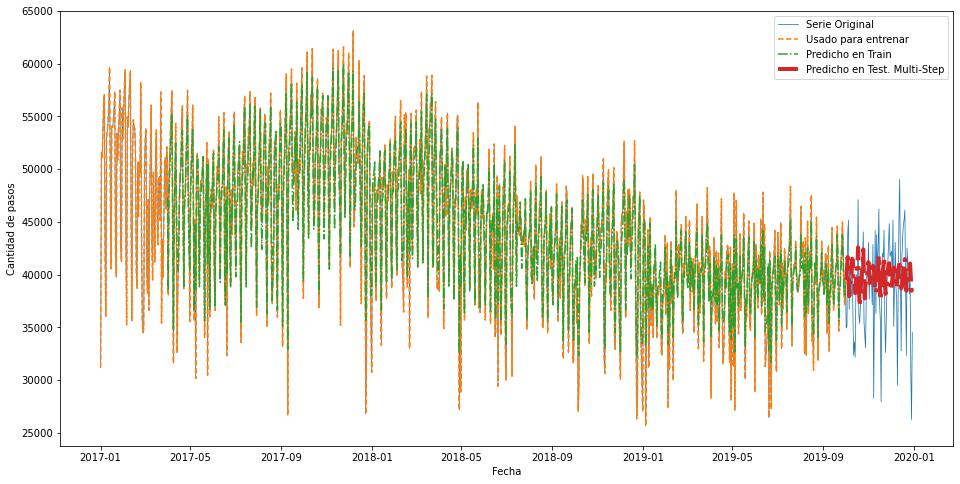

In [66]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

Y calculamos el error RMSE

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE))
r2_test = r2_score(y_test, y_ms_test_pred)
print('R2_test' , r2_test )

Error en Train: 4145.071636635278
R2_test 0.16891313475520298


El resultado es más deficiente que en el modelo one-step, es probable que se deba a que si ya esta inducido un error en el modelo, seguir prediciendo a partir de el conlleva a incrementar la desviación de los resultados de la predicción.

# PREDICCIÓN PARA EL AÑO 2020

In [68]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [69]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [70]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [71]:
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [72]:
dataset_2020 = data_2020.copy()

mask_2020 = np.logical_and(dataset_2020.estacion=='ILLIA', dataset_2020.forma_pago == 'Efectivo')   
dataset_2020 = dataset_2020[mask_2020]   

dataset_2020.drop(columns = ['periodo','hora_inicio',   'hora_fin' , 'mes' , 'dia_fecha' , 'observacion'  ], inplace = True)   

dataset_2020.head()

,fecha,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
52,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0
53,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Provincia,319.0
134,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Centro,199.0
135,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Provincia,180.0
202,2020-01-01 00:00:00,Miércoles,ILLIA,Auto,Efectivo,Centro,114.0


In [73]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_2020['fecha2'] = pd.to_datetime(dataset_2020.fecha) 

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_2020.drop(columns=['fecha',], inplace = True)

dataset_2020.head()

,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha2
52,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0,2020-01-01
53,Miércoles,ILLIA,Auto,Efectivo,Provincia,319.0,2020-01-01
134,Miércoles,ILLIA,Auto,Efectivo,Centro,199.0,2020-01-01
135,Miércoles,ILLIA,Auto,Efectivo,Provincia,180.0,2020-01-01
202,Miércoles,ILLIA,Auto,Efectivo,Centro,114.0,2020-01-01


In [74]:
#Corregimos el nombre de fecha2 a fecha
dataset_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_2020.head()

,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
52,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0,2020-01-01
53,Miércoles,ILLIA,Auto,Efectivo,Provincia,319.0,2020-01-01
134,Miércoles,ILLIA,Auto,Efectivo,Centro,199.0,2020-01-01
135,Miércoles,ILLIA,Auto,Efectivo,Provincia,180.0,2020-01-01
202,Miércoles,ILLIA,Auto,Efectivo,Centro,114.0,2020-01-01


In [75]:
#Reordenamos el dataset por fecha
dataset_2020.sort_values('fecha', inplace = True)
dataset_2020.reset_index(drop=True, inplace = True)
dataset_2020

,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha
0,Miércoles,ILLIA,Auto,Efectivo,Centro,326.0,2020-01-01
1,Miércoles,ILLIA,Pago Doble Auto,Efectivo,Provincia,2.0,2020-01-01
2,Miércoles,ILLIA,Pesados 2 Ejes,Efectivo,Centro,1.0,2020-01-01
3,Miércoles,ILLIA,Pesados 2 Ejes,Efectivo,Provincia,2.0,2020-01-01
4,Miércoles,ILLIA,Pesados 2 Ejes,Efectivo,Centro,2.0,2020-01-01
...,...,...,...,...,...,...,...
52369,Jueves,ILLIA,Moto,Efectivo,Provincia,16.0,2020-12-31
52370,Jueves,ILLIA,Moto,Efectivo,Centro,13.0,2020-12-31
52371,Jueves,ILLIA,Moto,Efectivo,Provincia,8.0,2020-12-31
52372,Jueves,ILLIA,Moto,Efectivo,Provincia,18.0,2020-12-31


In [76]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
dataset_final = dataset_2020.resample('D', on = 'fecha').sum()
print(dataset_final.shape)
dataset_final.head(10)

(366, 1)


,cantidad_pasos
fecha,
2020-01-01,21395.0
2020-01-02,33722.0
2020-01-03,37067.0
2020-01-04,30627.0
2020-01-05,27812.0
2020-01-06,33835.0
2020-01-07,34413.0
2020-01-08,35762.0
2020-01-09,35926.0


In [77]:
dataset_total = pd.concat([diario2 , dataset_final])
dataset_total

,cantidad_pasos,fecha_numeros
2017-01-01,31183.0,736330.0
2017-01-02,51568.0,736331.0
2017-01-03,51093.0,736332.0
2017-01-04,53332.0,736333.0
2017-01-05,56486.0,736334.0
...,...,...
2020-12-27,8434.0,NaN
2020-12-28,10311.0,NaN
2020-12-29,12036.0,NaN
2020-12-30,12527.0,NaN


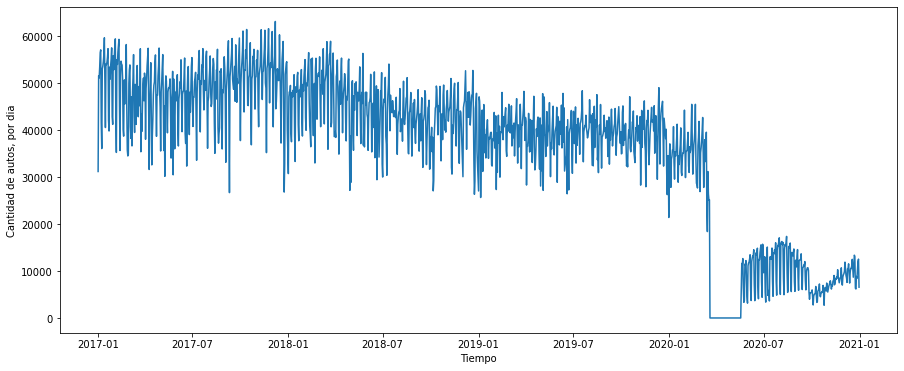

In [78]:
plt.figure(figsize = (15,6))
plt.plot(dataset_total.index, dataset_total.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Acá podemos observar que los cierres ocacionados por la pandemia afectan de forma importante los datos en comparación con los de los años anteriores.

In [79]:
senial_2020 = dataset_total.cantidad_pasos
senial_2020.head()

2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [80]:
senial_2020

2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
               ...   
2020-12-27     8434.0
2020-12-28    10311.0
2020-12-29    12036.0
2020-12-30    12527.0
2020-12-31     6553.0
Freq: D, Name: cantidad_pasos, Length: 1461, dtype: float64

In [81]:
senial_2020.shape

(1461,)

In [82]:
look_back_2020 = 90 

In [83]:
N_2020 = senial_2020.shape[0]  #reduzco el dataset de entreno 366 dias para no tener en cuenta el 2020
X_2020 = np.zeros((N_2020 - look_back_2020 - 1,look_back_2020))
y_2020 = np.zeros(N_2020 - look_back_2020 -1)
print(X_2020.shape, y_2020.shape)

(1370, 90) (1370,)


In [84]:
for i in range(X_2020.shape[0]):
    X_2020[i,:] = senial_2020.iloc[i:i+look_back_2020]
    y_2020[i] = senial_2020.iloc[i+look_back_2020]

In [85]:
print(X_2020.shape)
print(y_2020.shape)

(1370, 90)
(1370,)


In [86]:
X_2020 , y_2020

(array([[31183., 51568., 51093., ..., 51074., 46235., 52127.],
        [51568., 51093., 53332., ..., 46235., 52127., 50995.],
        [51093., 53332., 56486., ..., 52127., 50995., 38045.],
        ...,
        [ 5369.,  5432.,  5431., ...,  6172.,  8840.,  8434.],
        [ 5432.,  5431.,  5982., ...,  8840.,  8434., 10311.],
        [ 5431.,  5982.,  4223., ...,  8434., 10311., 12036.]]),
 array([50995., 38045., 48833., ..., 10311., 12036., 12527.]))

In [87]:
N_train_2020 = 1095 - look_back_2020  # cantidad de instancias que vamos a usar para entrenar. 
N_test_2020 = 365  #cantidad de puntos que vamos a usar para evaluar
N_total_2020 = N_train_2020 + N_test_2020


length_total_2020 = N_train_2020 + N_test_2020 + look_back_2020

X_train_2020 = X_2020[:N_train_2020,:]
y_train_2020 = y_2020[:N_train_2020]
print(X_train_2020.shape, y_train_2020.shape)

X_test_2020 = X_2020[N_train_2020:N_train_2020+N_test_2020,:]
y_test_2020 = y_2020[N_train_2020:N_train_2020+N_test_2020]
print(X_test_2020.shape, y_test_2020.shape)

(1005, 90) (1005,)
(365, 90) (365,)


In [88]:
X_train_2020

array([[31183., 51568., 51093., ..., 51074., 46235., 52127.],
       [51568., 51093., 53332., ..., 46235., 52127., 50995.],
       [51093., 53332., 56486., ..., 52127., 50995., 38045.],
       ...,
       [37170., 39669., 34943., ..., 38168., 40182., 30681.],
       [39669., 34943., 35054., ..., 40182., 30681., 26259.],
       [34943., 35054., 43775., ..., 30681., 26259., 34523.]])

In [89]:
y_train_2020

array([50995., 38045., 48833., ..., 26259., 34523., 34523.])

In [90]:
X_test_2020

array([[35054., 43775., 45150., ..., 26259., 34523., 34523.],
       [43775., 45150., 36722., ..., 34523., 34523., 21395.],
       [45150., 36722., 41064., ..., 34523., 21395., 33722.],
       ...,
       [ 5369.,  5432.,  5431., ...,  6172.,  8840.,  8434.],
       [ 5432.,  5431.,  5982., ...,  8840.,  8434., 10311.],
       [ 5431.,  5982.,  4223., ...,  8434., 10311., 12036.]])

In [91]:
y_test_2020

array([2.1395e+04, 3.3722e+04, 3.7067e+04, 3.0627e+04, 2.7812e+04,
       3.3835e+04, 3.4413e+04, 3.5762e+04, 3.5926e+04, 4.0740e+04,
       3.3120e+04, 2.9563e+04, 3.5351e+04, 3.4437e+04, 3.5532e+04,
       3.7932e+04, 4.1255e+04, 3.3409e+04, 2.8902e+04, 3.4522e+04,
       3.2673e+04, 3.5296e+04, 3.6885e+04, 4.0471e+04, 3.1010e+04,
       3.0335e+04, 3.4200e+04, 3.5128e+04, 3.5081e+04, 3.8491e+04,
       4.4249e+04, 3.6295e+04, 2.9891e+04, 3.5443e+04, 3.5485e+04,
       3.5738e+04, 3.7575e+04, 3.9527e+04, 3.2399e+04, 3.0978e+04,
       3.6458e+04, 3.5213e+04, 3.5812e+04, 4.0015e+04, 4.5484e+04,
       3.7850e+04, 3.0626e+04, 3.4240e+04, 3.6860e+04, 3.7935e+04,
       4.0041e+04, 4.5488e+04, 3.3837e+04, 2.8695e+04, 2.8421e+04,
       2.7675e+04, 3.6706e+04, 3.8474e+04, 4.1855e+04, 3.5449e+04,
       2.6907e+04, 3.5181e+04, 3.6239e+04, 3.7627e+04, 3.9850e+04,
       4.2686e+04, 3.5531e+04, 2.7796e+04, 3.3823e+04, 3.7960e+04,
       3.3290e+04, 3.6730e+04, 3.9548e+04, 2.3052e+04, 1.8390e

In [92]:
print (look_back_2020)
print (N_train_2020) 
print (N_test_2020)
print (N_total_2020)
print (length_total_2020)
#print (X_train)
#print (y_train)
#print (X_test)
#print (y_test)

90
1005
365
1370
1460


## MODELO RANDOMFORESTREGRESSOR 2020

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf_2020 = RandomForestRegressor(n_estimators=374, criterion = "mse" , max_features='sqrt', max_depth=15 , min_samples_leaf = 1,
                               min_samples_split = 2 , n_jobs=-1, oob_score = False, random_state = 42)
rf_2020.fit(X_train_2020,y_train_2020)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=374,
                      n_jobs=-1, random_state=42)

### MEJORA DE LOS HIPERPARAMETROS 2020

In [104]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_RF_2020 = {'n_estimators':np.arange(50, 500),
                      'max_depth':np.arange(10, 60),
                      'criterion': [ 'mse' ],
                      'min_samples_split':np.arange(2, 4),
                      'min_samples_leaf':np.arange(1, 4)
                        }     

In [105]:
model_RF_2020 = RandomizedSearchCV(rf_2020, param_grid_RF_2020, n_iter=100, random_state=0, cv=5 , n_jobs = -1  )
model_RF_2020.fit(X_train_2020,y_train_2020)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=32,
                                                   max_features='sqrt',
                                                   min_samples_leaf=3,
                                                   min_samples_split=3,
                                                   n_estimators=113, n_jobs=-1,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 4...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456,

In [106]:
print("Mejores parametros: "+str(model_RF_2020.best_params_))
print("Mejor Score: "+str(model_RF_2020.best_score_)+'\n')

scores_RF_2020 = pd.DataFrame(model_RF_2020.cv_results_)

Mejores parametros: {'n_estimators': 374, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'mse'}
Mejor Score: 0.3509057450402488



#### MÁS DEL MODELO

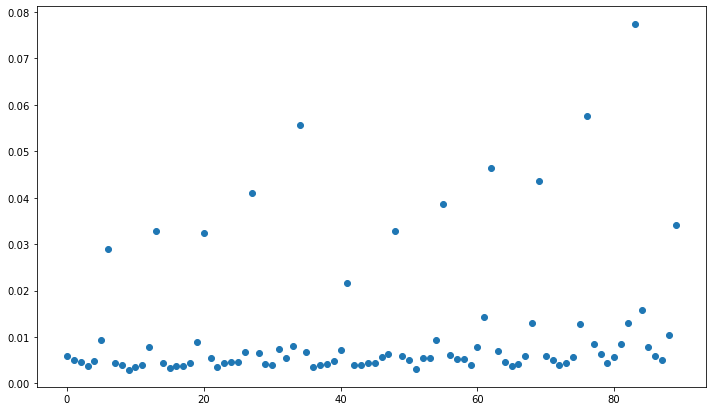

In [108]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(rf_2020.feature_importances_.size),rf_2020.feature_importances_)

plt.show()

## ONE STEP

In [94]:
y_pred_2020 = rf_2020.predict(X_2020)
y_train_pred_2020 = rf_2020.predict(X_train_2020)
y_test_pred_2020 = rf_2020.predict(X_test_2020)

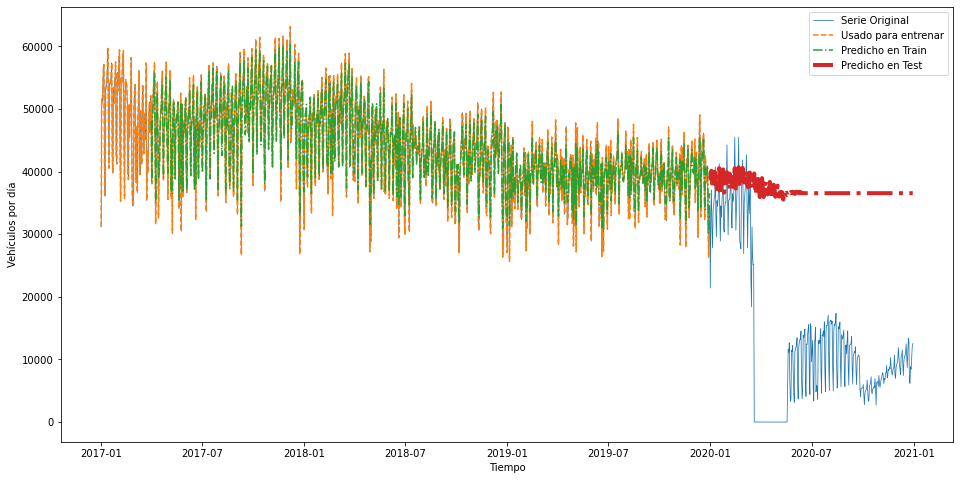

In [95]:
plt.figure(figsize=(16,8))
plt.plot(senial_2020.index[:length_total_2020], senial_2020[:length_total_2020],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2020.index[:N_train_2020 + look_back_2020], senial_2020[:N_train_2020 + look_back_2020],'--', label = 'Usado para entrenar')
plt.plot(senial_2020.index[look_back_2020: look_back_2020 + N_train_2020], y_train_pred_2020,'-.',label = 'Predicho en Train')
plt.plot(senial_2020.index[N_train_2020+look_back_2020: length_total_2020], y_test_pred_2020,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Vehículos por día')
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE_2020_train = mean_squared_error(y_train_2020, y_train_pred_2020)
print('Error en Train:',np.sqrt(MSE_2020_train))
r2_train_2020 = r2_score(y_train_2020, y_train_pred_2020)
print('R2_train' , r2_train_2020 )


MSE_2020_test = mean_squared_error(y_test_2020, y_test_pred_2020)
print('Error en Test:',np.sqrt(MSE_2020_test))
r2_test_2020 = r2_score(y_test_2020, y_test_pred_2020)
print('R2_test' , r2_test_2020 )

Error en Train: 1664.1049956458721
R2_train 0.9445979683021946
Error en Test: 26387.573909340248
R2_test -3.6648380214058642


El resultado predictivo es nulo, el modelo obviamente no puede predecir lo que sucedió en el 2020, la única forma en que posiblemente mejoraría el modelo sería entrenandolo con los mismos datos del 2020, las situaciones del pasado no aplican para predecir el año de pandemia

## PREDICCIÓN DEL MODELO

## MULTI-STEP

In [97]:
y_ms_test_pred_2020 = []
x_2020 = X_test_2020[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test_2020.size):
    y_os_pred_2020 = rf_2020.predict(x_2020.reshape(1,-1))
    y_ms_test_pred_2020.append(y_os_pred_2020)
    x_2020 = np.append(x_2020[1:], y_os_pred_2020)
y_ms_test_pred_2020 = np.array(y_ms_test_pred_2020)

<AxesSubplot:>

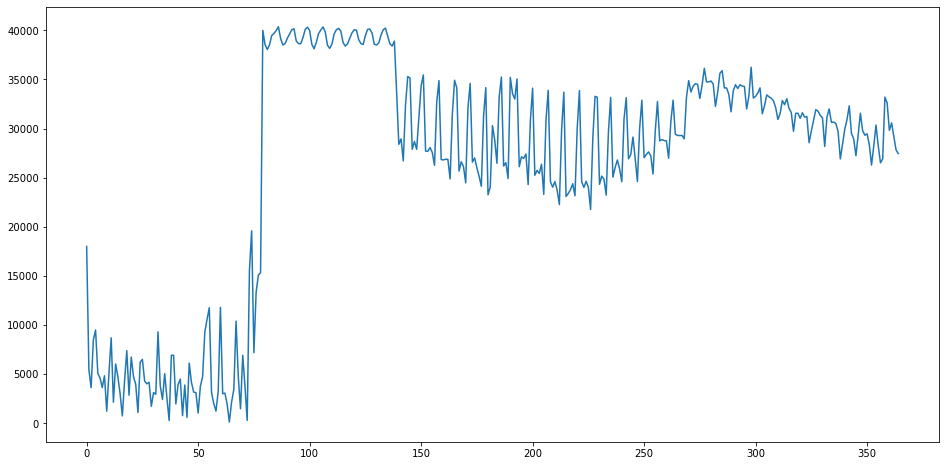

In [98]:
plt.figure(figsize=(16,8))
pred_comp_2020 = pd.DataFrame()
pred_comp_2020['y_test_2020'] = y_test_2020
pred_comp_2020['y_test_model_2020'] = y_ms_test_pred_2020
pred_comp_2020['abs_diff_2020'] = abs(pred_comp_2020['y_test_2020']-pred_comp_2020['y_test_model_2020'])
pred_comp_2020['abs_diff_2020'].plot()

Se puede observar que existe una gran variación entre el valor predicho y el valor original de la serie

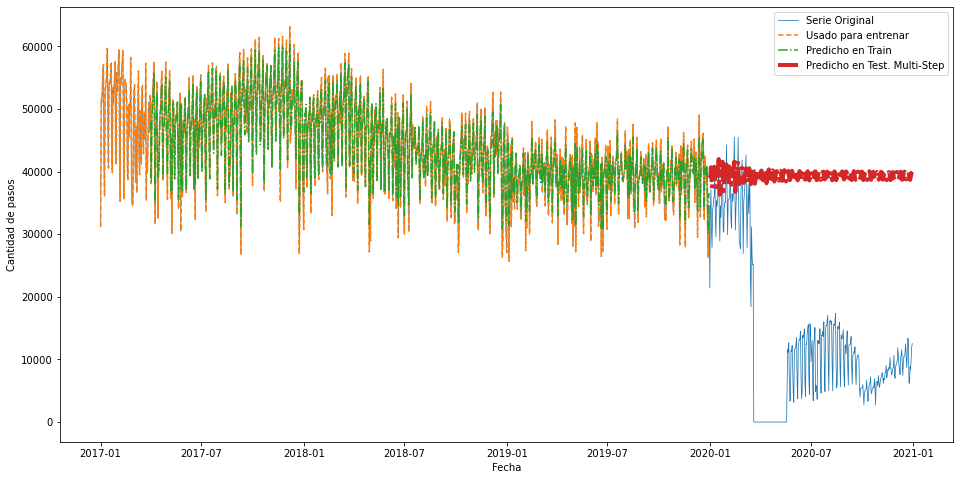

In [99]:
plt.figure(figsize=(16,8))
plt.plot(senial_2020.index[:length_total_2020], senial_2020[:length_total_2020],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2020.index[:N_train_2020 + look_back_2020], senial_2020[:N_train_2020 + look_back_2020],'--', label = 'Usado para entrenar')
plt.plot(senial_2020.index[look_back_2020: look_back_2020 + N_train_2020], y_train_pred_2020,'-.',label = 'Predicho en Train')
plt.plot(senial_2020.index[N_train_2020+look_back_2020: length_total_2020], y_ms_test_pred_2020,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

In [100]:
MSE_2020_MS = mean_squared_error(y_test_2020, y_ms_test_pred_2020)
print('Error en Train:',np.sqrt(MSE_2020_MS))
r2_test_2020 = r2_score(y_test_2020, y_ms_test_pred_2020)
print('r2_test_2020' , r2_test_2020 )

Error en Train: 28670.405138184393
r2_test_2020 -4.506876065754235


El resultado predictivo bajo el modelo multistep sigue siendo nulo, si alimento el modelo con predicciones basadas en el pasado y sigo proyectando esta situación, es obvio que en un año totalmente atípico la probabilidad de acertar es casi nula.

### Benchmark

In [101]:
y_test_pred_benchmark_2020 = y_2020[-1 + N_train_2020:N_train_2020+N_test_2020 - 1]

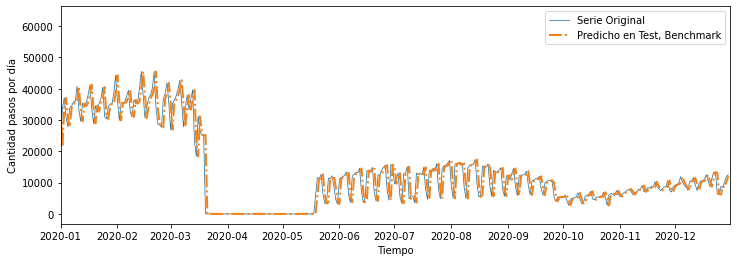

In [102]:
plt.figure(figsize=(12,4))
plt.plot(senial_2020.index[:length_total_2020], senial_2020[:length_total_2020],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2020.index[N_train_2020+look_back_2020: length_total_2020], y_test_pred_benchmark_2020,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial_2020.index[N_train_2020+look_back_2020], senial_2020.index[length_total_2020])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad pasos por día')
plt.legend()
plt.show()

In [103]:
y_test_pred_benchmark_2020 = y_2020[-1 + N_train_2020:N_train_2020+N_test_2020 - 1]
MSE_benchmark_2020 = mean_squared_error(y_test_2020, y_2020[-1 + N_train_2020:N_train_2020+N_test_2020 - 1])
print(np.sqrt(MSE_benchmark_2020))

r2_test_antday_2020 = r2_score(y_test_2020, y_2020[-1 + N_train_2020:N_train_2020+N_test_2020 - 1])
print('r2_test_antday_2020' , r2_test_antday_2020 )

4011.8111217643745
r2_test_antday_2020 0.8921752155209958


### CONCLUSIÓN 2020

Si bien tanto el modelo ONE-STEP y MULTI-STEP presentan valores predictivos muy alejados de la realidad por causas de la pandemia, considero que el modelo que más hubiese sido el acertado para predecir un teórico 2020 hubiese sido el multi-step, esto solo serviría cómo un tema de anécdota, pues al realizar cálculo por el multistep hubiese mantenido la tendencia que traía de datos anteriores sin incorporar los nuevos datos 0 producto de la pandemia, pero una vez se incorporan estos datos 0 en las ventanas de tiempo en el modelo ONE-STEP la predicción se vuelve casi lineal.

Sin embargo, cualquier modelo que se utilice con información sobre el pasado para predecir el 2020 será fallildo, además que cualquier información que se use del 2020 para predecir datos futuros también arrojará errores.

Tambien se hace el ejercicio de realizar el benchmark con la predicción de utilizar el dato del día anterior, la información que surge de este se supone que es bastante buena pues existe un gran lapso en que los pasos fueron 0, por lo tanto la predicción en ese lapso siempre acierta en el día siguiente y en la reactivación al ser lenta el valor de error es bajo por lo cual mse se disminuye.

## PARTE C

### Qué me gustaría probar?:

Me gustaría implementar un modelo de red neuronal utilizando las variables de tiempo, día de la semana y día del mes, esto con el fin de determinar los valores en el último trimestre y así saber si el modelo de redes neuronales es más acertado que el que utilicé durante el proyecto.

Para ello deberé organizar el dataset en ventanas de 90 días (con el fin que sea igual al utilizado en este proyecto y así más comparable) y en ese dataset deberé incluir las variables día de la semana (la cual deberé codificar de forma numérica) y número del mes, esperando que el modelo tome estos valores cómo importantes en la predicción del número de pasos.

El valor de número de pasos lo deberé reescalar entre -1 y 1, pues los modelos de redes neuronales interpretan mejor esta escala.

Después de deberé realizar un split de la información para testearlo y validarlo y así lograr un modelo entrenado, el cual utilizaré para realizar un multistep a partir de la predicción que se logre del último arreglo o ventana de 90 días.

Por último lo reescalaré nuevamente en número de pasos y lo compararé con los datos reales para determinar la raiz cuadrada del error y el R2 y compararlo con el modelo implementado en este trabajo y determinar si logro mejoras.

Para ello investigué y creo que una información que puedo adaptar a mi problema está en la siguiente dirección web:

https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/



## Que resultados espero encontrar?

Al ser un modelo más robusto y que tendrá en cuenta las variables adicionales de día y de mes espero un mejor resultado que el implementado en el proyecto 3, es posible que al ser un multistep se alimente de la información del 2017 y 2018 que tiene mayor movimiento en los pagos en efectivo y no proyecte una tendencia de disminución que es lo que más parece darse en el último trimestre.

### Adelanto del adecuamiento de la información para la implementación de un ML de redes neuronales

In [104]:
diario3 = diario2.copy()
diario3['weekday']=[x.weekday() for x in diario3.index]
diario3['month']=[x.month for x in diario3.index]
diario3.drop(diario3.columns[[1]], axis=1, inplace=True)
diario3.head(1100)

,cantidad_pasos,weekday,month
fecha2,,,
2017-01-01,31183.0,6,1
2017-01-02,51568.0,0,1
2017-01-03,51093.0,1,1
2017-01-04,53332.0,2,1
2017-01-05,56486.0,3,1
...,...,...,...
2019-12-27,40182.0,4,12
2019-12-28,30681.0,5,12
2019-12-29,26259.0,6,12


In [105]:
diario3.describe()

,cantidad_pasos,weekday,month
count,1095.000000,1095.000000,1095.000000
mean,44104.300457,2.998174,6.526027
std,7216.308890,2.003196,3.449427
min,25650.000000,0.000000,1.000000
25%,39141.000000,1.000000,4.000000
50%,43766.000000,3.000000,7.000000
75%,49514.500000,5.000000,10.000000
max,63127.000000,6.000000,12.000000


In [106]:
PASOS=90
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [108]:
from sklearn.preprocessing import MinMaxScaler

PASOS=90

# load dataset
values = diario3['cantidad_pasos'].values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)

diario3['scaled'] = scaled
scaledMerge=diario3.drop('cantidad_pasos',axis=1)
#print(scaledMerge.values)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge, PASOS, 1)

In [109]:
diario3

,cantidad_pasos,weekday,month,scaled
fecha2,,,,
2017-01-01,31183.0,6,1,-0.704726
2017-01-02,51568.0,0,1,0.383142
2017-01-03,51093.0,1,1,0.357793
2017-01-04,53332.0,2,1,0.477279
2017-01-05,56486.0,3,1,0.645596
...,...,...,...,...
2019-12-27,40182.0,4,12,-0.224484
2019-12-28,30681.0,5,12,-0.731515
2019-12-29,26259.0,6,12,-0.967500


In [110]:
reframed

,var1(t-90),var2(t-90),var3(t-90),var1(t-89),var2(t-89),var3(t-89),var1(t-88),var2(t-88),var3(t-88),var1(t-87),...,var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
fecha2,,,,,,,,,,,,,,,,,,,,,
2017-04-01,6.0,1.0,-0.704726,0.0,1.0,0.383142,1.0,1.0,0.357793,2.0,...,0.356779,3.0,3.0,0.098541,4.0,3.0,0.412973,5,4,0.352563
2017-04-02,0.0,1.0,0.383142,1.0,1.0,0.357793,2.0,1.0,0.477279,3.0,...,0.098541,4.0,3.0,0.412973,5.0,4.0,0.352563,6,4,-0.338528
2017-04-03,1.0,1.0,0.357793,2.0,1.0,0.477279,3.0,1.0,0.645596,4.0,...,0.412973,5.0,4.0,0.352563,6.0,4.0,-0.338528,0,4,0.237185
2017-04-04,2.0,1.0,0.477279,3.0,1.0,0.645596,4.0,1.0,0.677349,5.0,...,0.352563,6.0,4.0,-0.338528,0.0,4.0,0.237185,1,4,0.347013
2017-04-05,3.0,1.0,0.645596,4.0,1.0,0.677349,5.0,1.0,-0.149505,6.0,...,-0.338528,0.0,4.0,0.237185,1.0,4.0,0.347013,2,4,0.494517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,5.0,9.0,-0.131467,6.0,9.0,-0.322358,0.0,9.0,-0.385223,1.0,...,-0.176739,2.0,12.0,-0.254352,3.0,12.0,-0.331964,4,12,-0.224484
2019-12-28,6.0,9.0,-0.322358,0.0,9.0,-0.385223,1.0,10.0,-0.251861,2.0,...,-0.254352,3.0,12.0,-0.331964,4.0,12.0,-0.224484,5,12,-0.731515
2019-12-29,0.0,9.0,-0.385223,1.0,10.0,-0.251861,2.0,10.0,-0.504069,3.0,...,-0.331964,4.0,12.0,-0.224484,5.0,12.0,-0.731515,6,12,-0.967500
